# Raisin Class Prediction (Logistic Regression Project)

**Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
9. Class: Kecimen and Besni raisin.

In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [152]:
df = pd.read_excel("Raisin_Dataset.xlsx")

# Exploratory Data Analysis (EDA) and Visualization

In [153]:
df.head(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [154]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [156]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [157]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

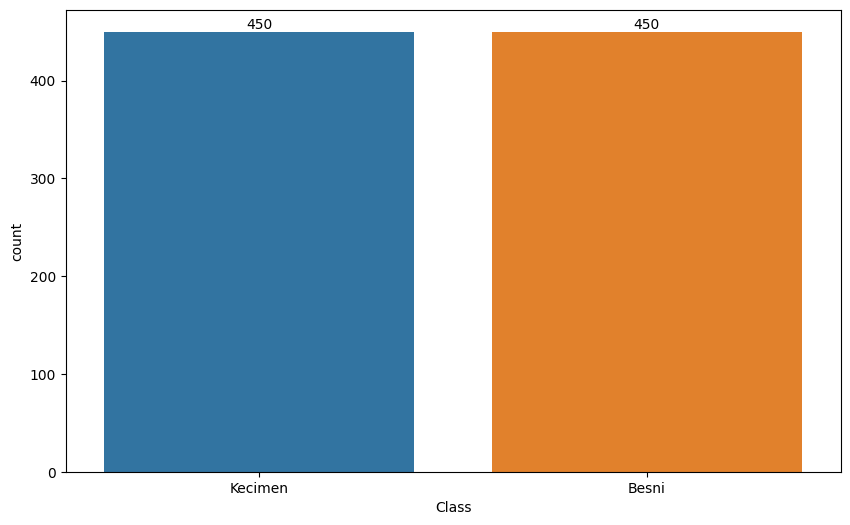

In [158]:
ax = sns.countplot(x="Class", data=df)
ax.bar_label(ax.containers[0]);

In [159]:
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})

# We mapped 'Kecimen' to 0 and 'Besni' to 1.
# We could have used the names directly for predictions, but we chose to map them.
# This was done to obtain the ROC AUC score, which requires numeric labels.

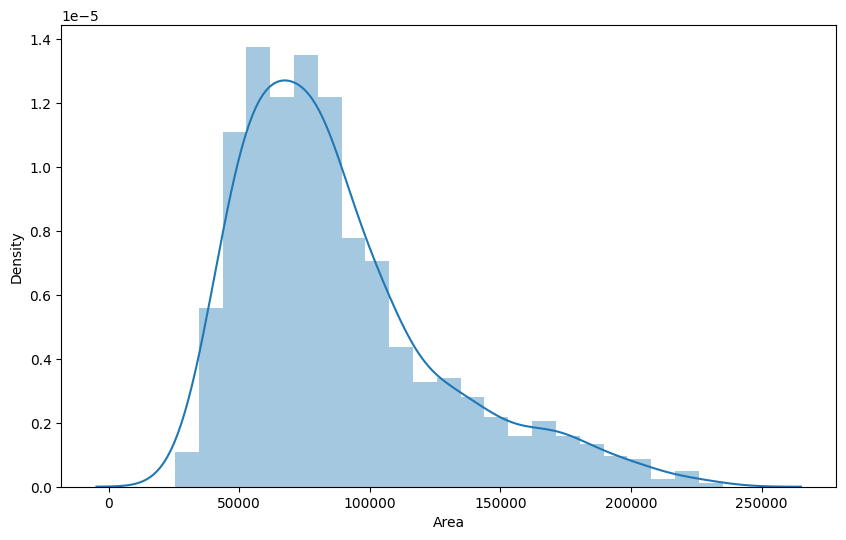

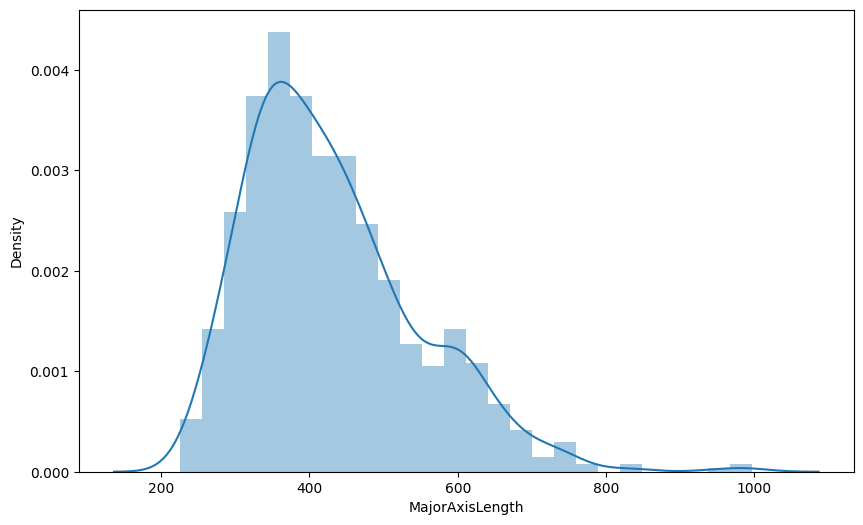

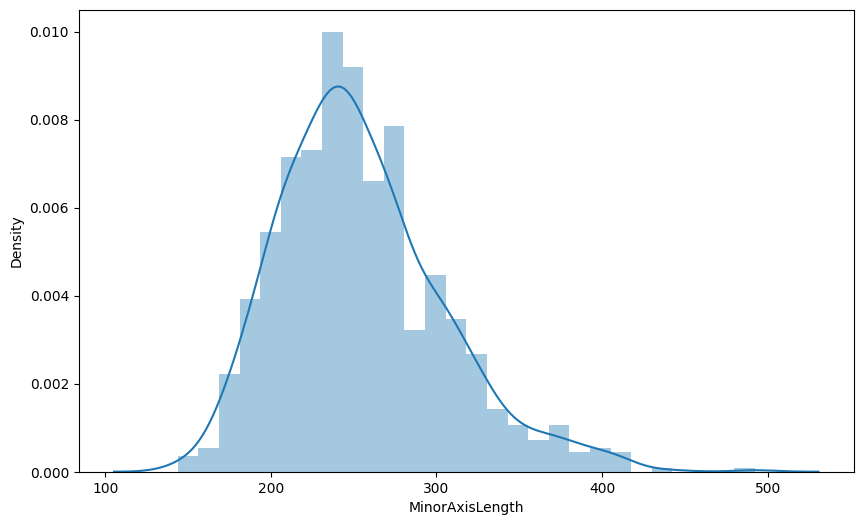

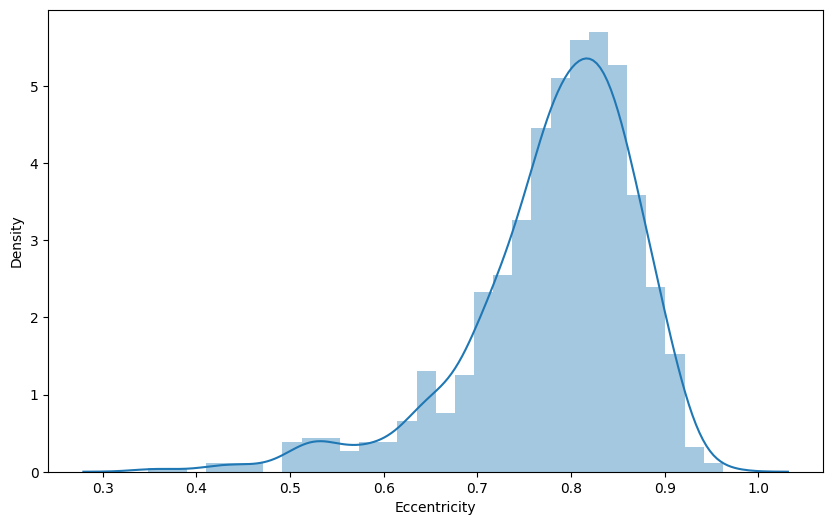

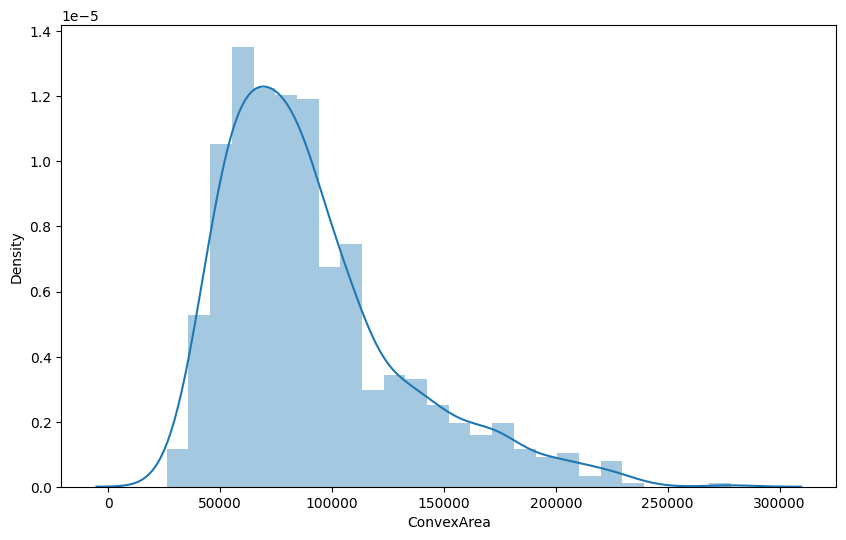

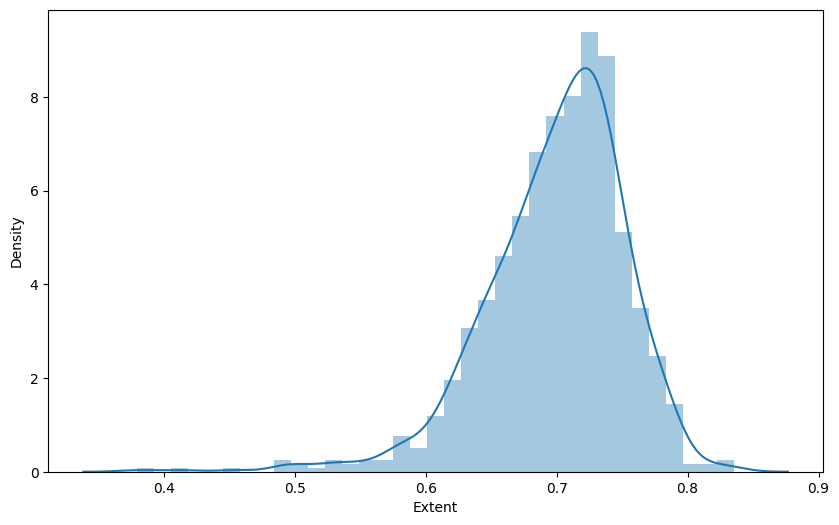

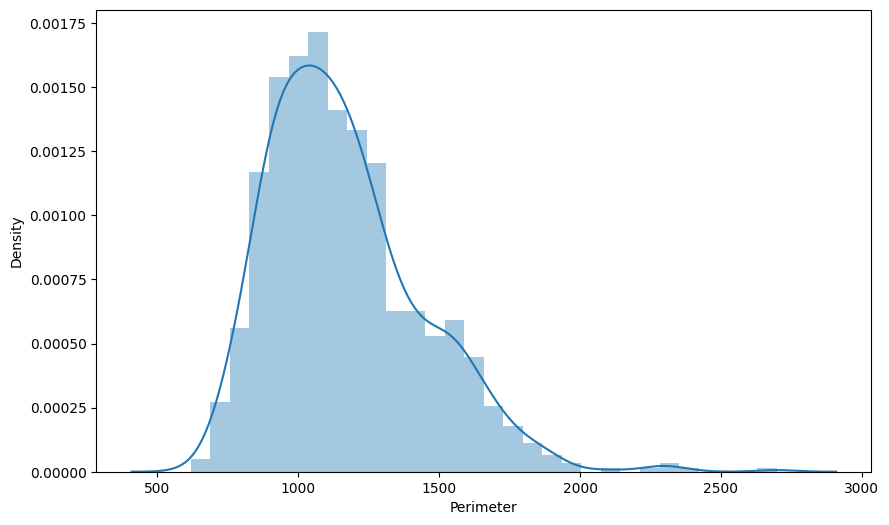

In [160]:
# Select all columns except the 'Class' column
x = df.loc[:, df.columns != "Class"]

# Create and display a distribution plot for each column
for i in x.columns:
    sns.distplot(df[i])
    plt.show()

# This code generates and displays distribution plots for all columns except the 'Class' column.
# Distribution plots are used to visualize the distribution of each feature (column) in the dataset,
# providing insights into the shape, central tendency, spread, and outliers of the data.

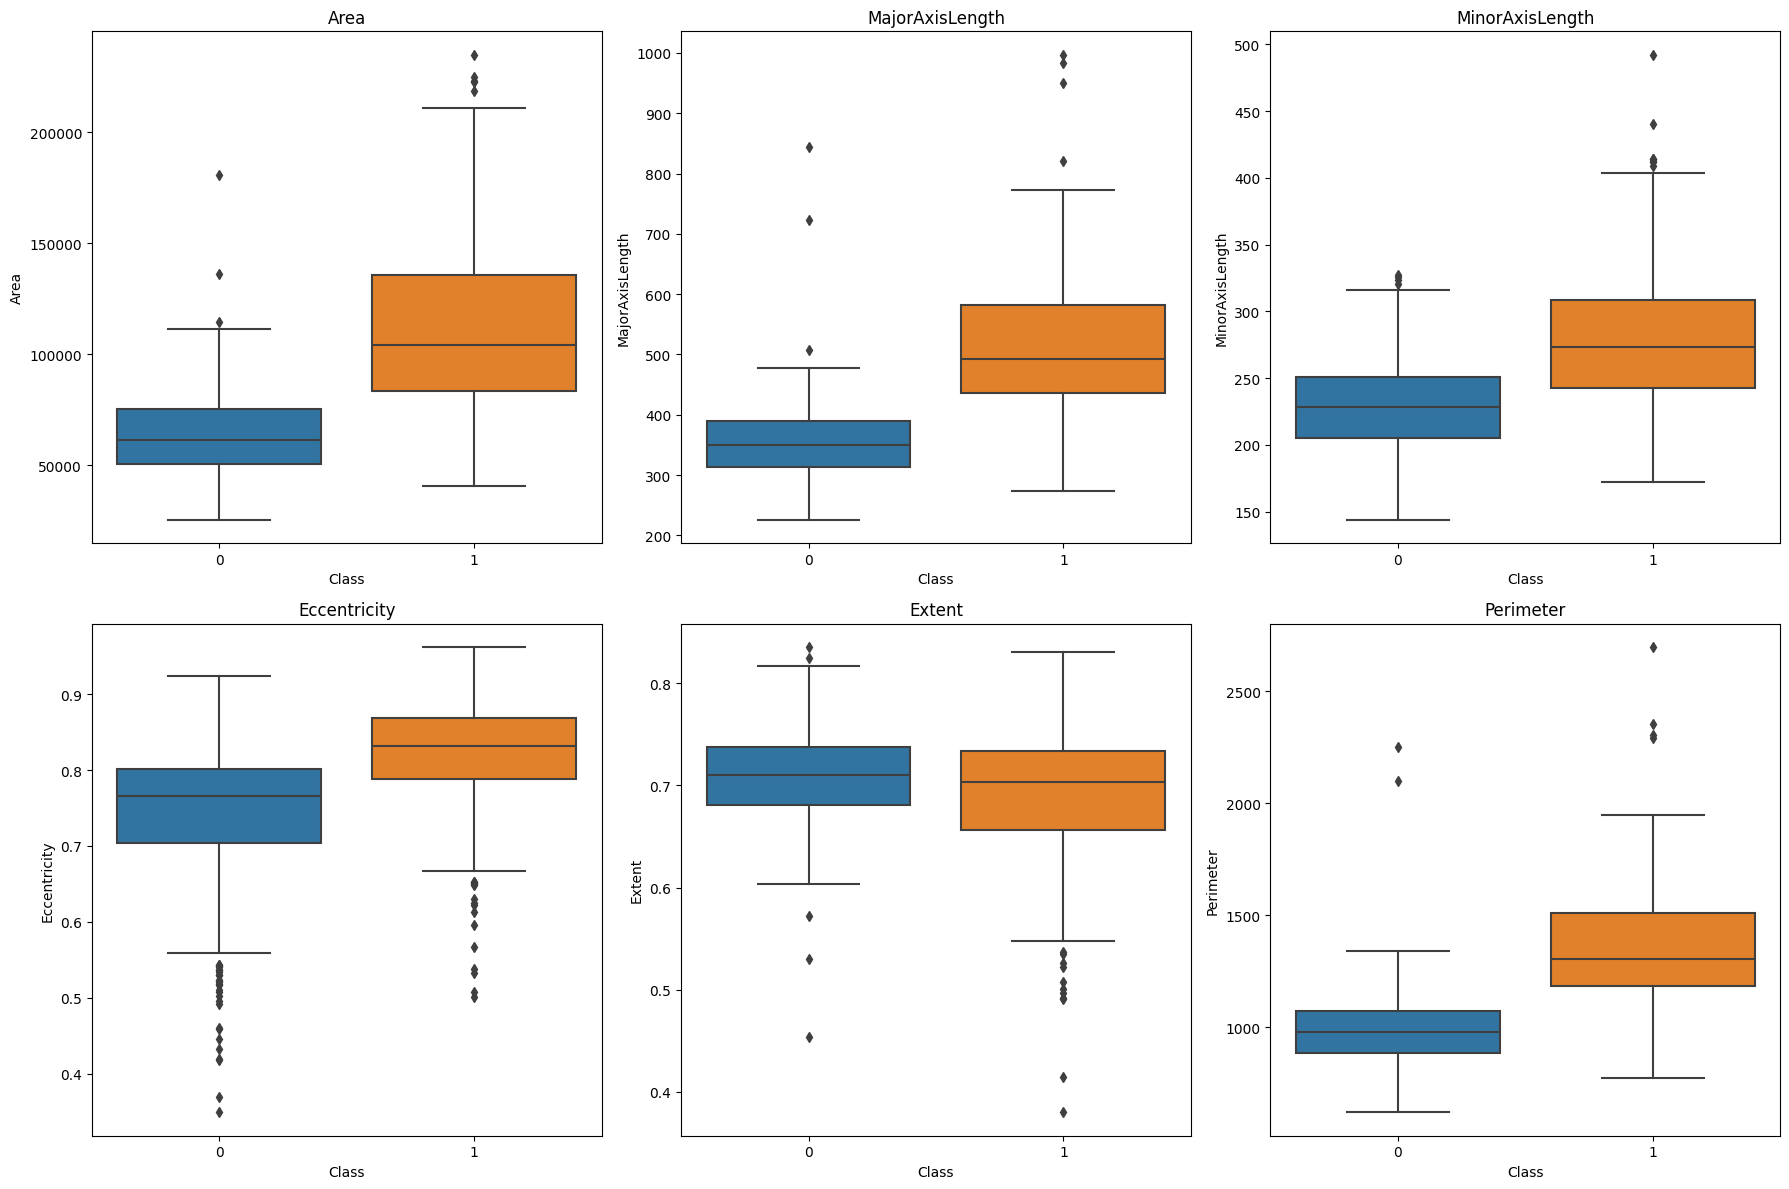

In [161]:
# Create a grid of subplots
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

# Remove 'Class' and 'ConvexArea' columns from the list
clmn = df.columns.tolist()
clmn.remove("Class")
clmn.remove("ConvexArea")

# Create a boxplot for each column
for ax, clmn in zip(ax, clmn):
    sns.boxplot(data=df, x="Class", y=clmn, ax=ax)
    ax.set_title(clmn)  # Add a title to each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()

# This code creates boxplots for each feature in the dataset, grouped by the 'Class' column,
# visualizing the distribution of each feature across different classes.
# The plots are arranged in a 2x3 grid, with each subplot displaying the distribution of a specific feature.

In [162]:
# Since we have outliers in many feautures , let's treat them 

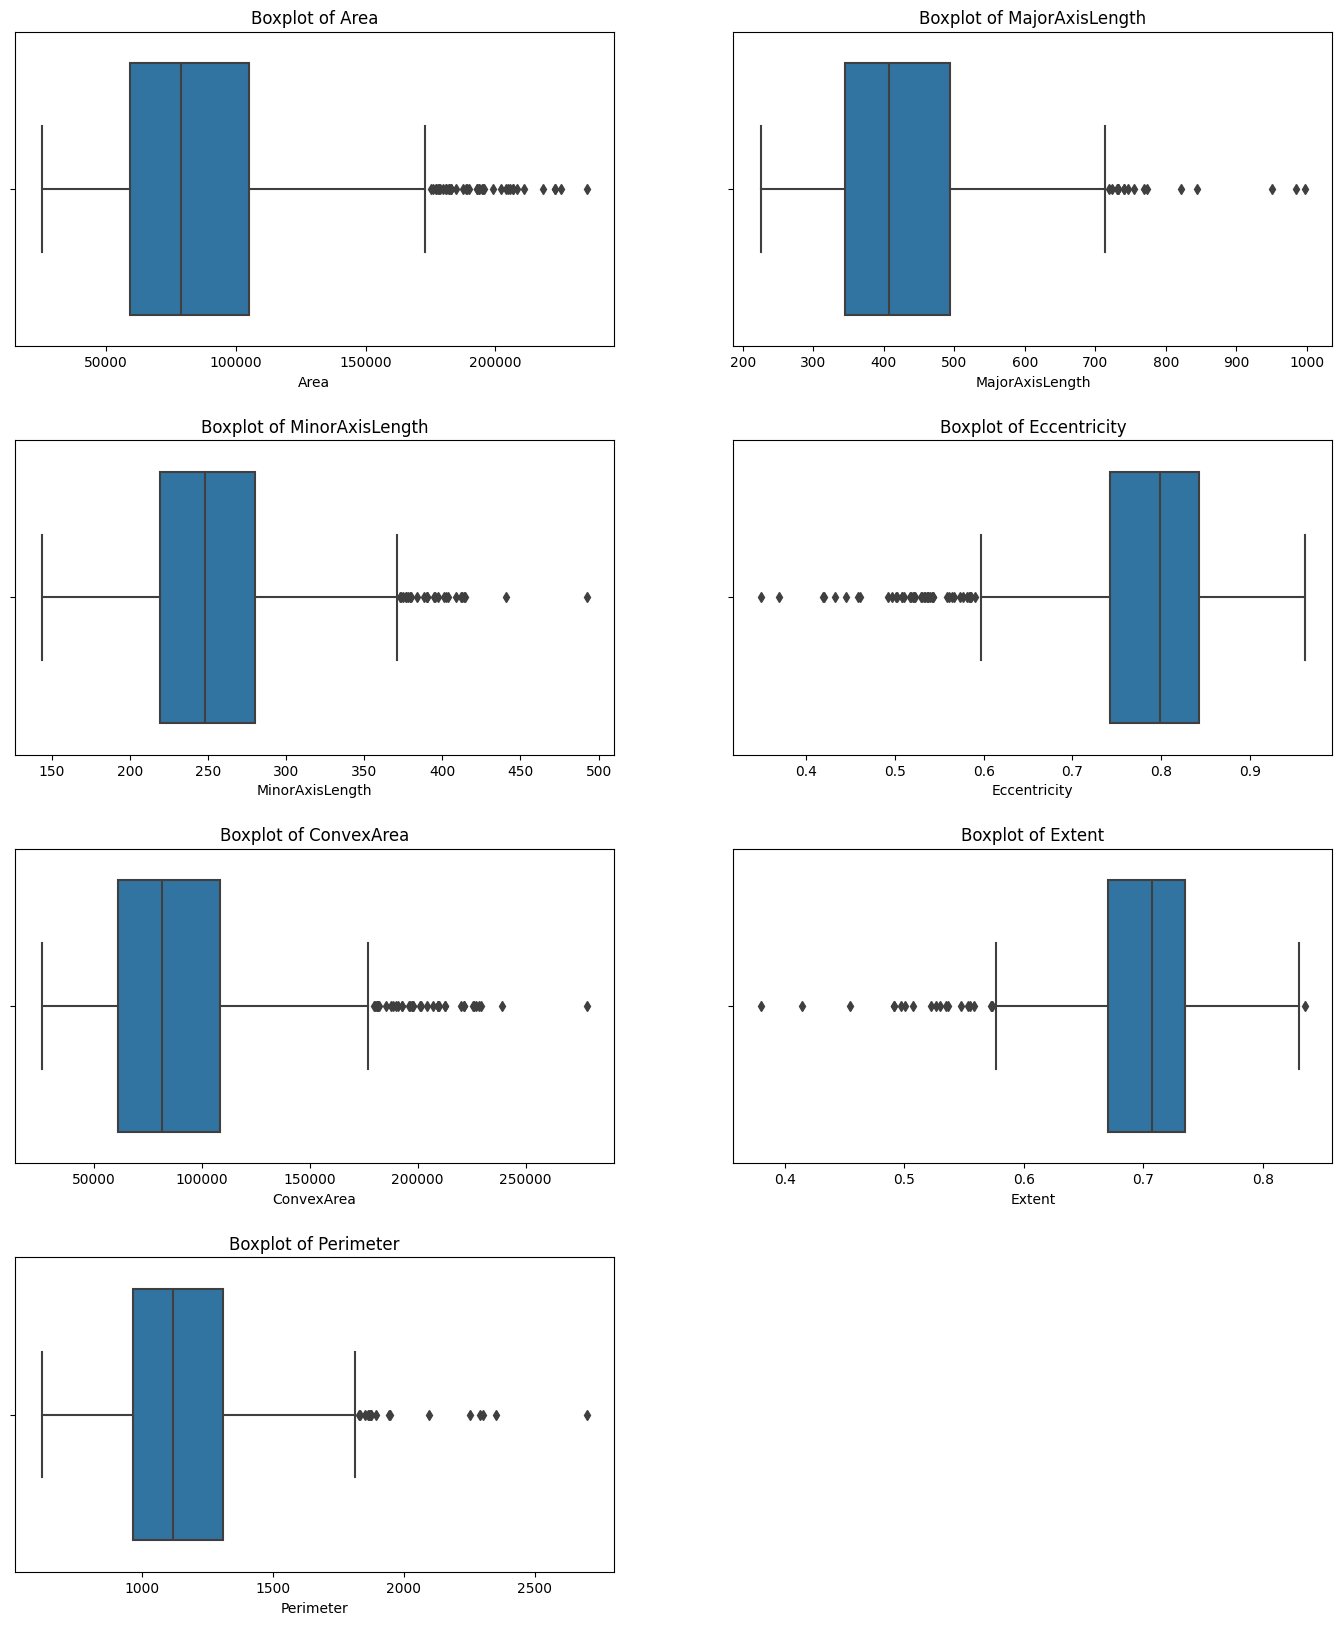

In [163]:
# defining features excluding the 'Class' column
features = df.columns[df.columns != "Class"]

# declaring total number of rows and columns
rows = 4
cols = 2

# creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(17, 5*rows))

# Flatten the axes if necessary
axes = axes.flatten()

# horizontal space between boxplots
plt.subplots_adjust(hspace=0.3)

# plotting individual boxplot for each feature
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    
# removing empty subplots if the number of features doesn't perfectly fit into the grid
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

In [164]:
# defining function to replace outliers
def replace_outliers_with_bounds(df):
    # numeric columns
    numeric_columns = df.drop("Class", axis = 1)
    
    # looping through each column
    for col in numeric_columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR)  # Cast to float
        upper_bound = float(q3 + 1.5 * IQR)  # Cast to float

        # replacing outliers with bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# running function to replace outliers
df = replace_outliers_with_bounds(df)

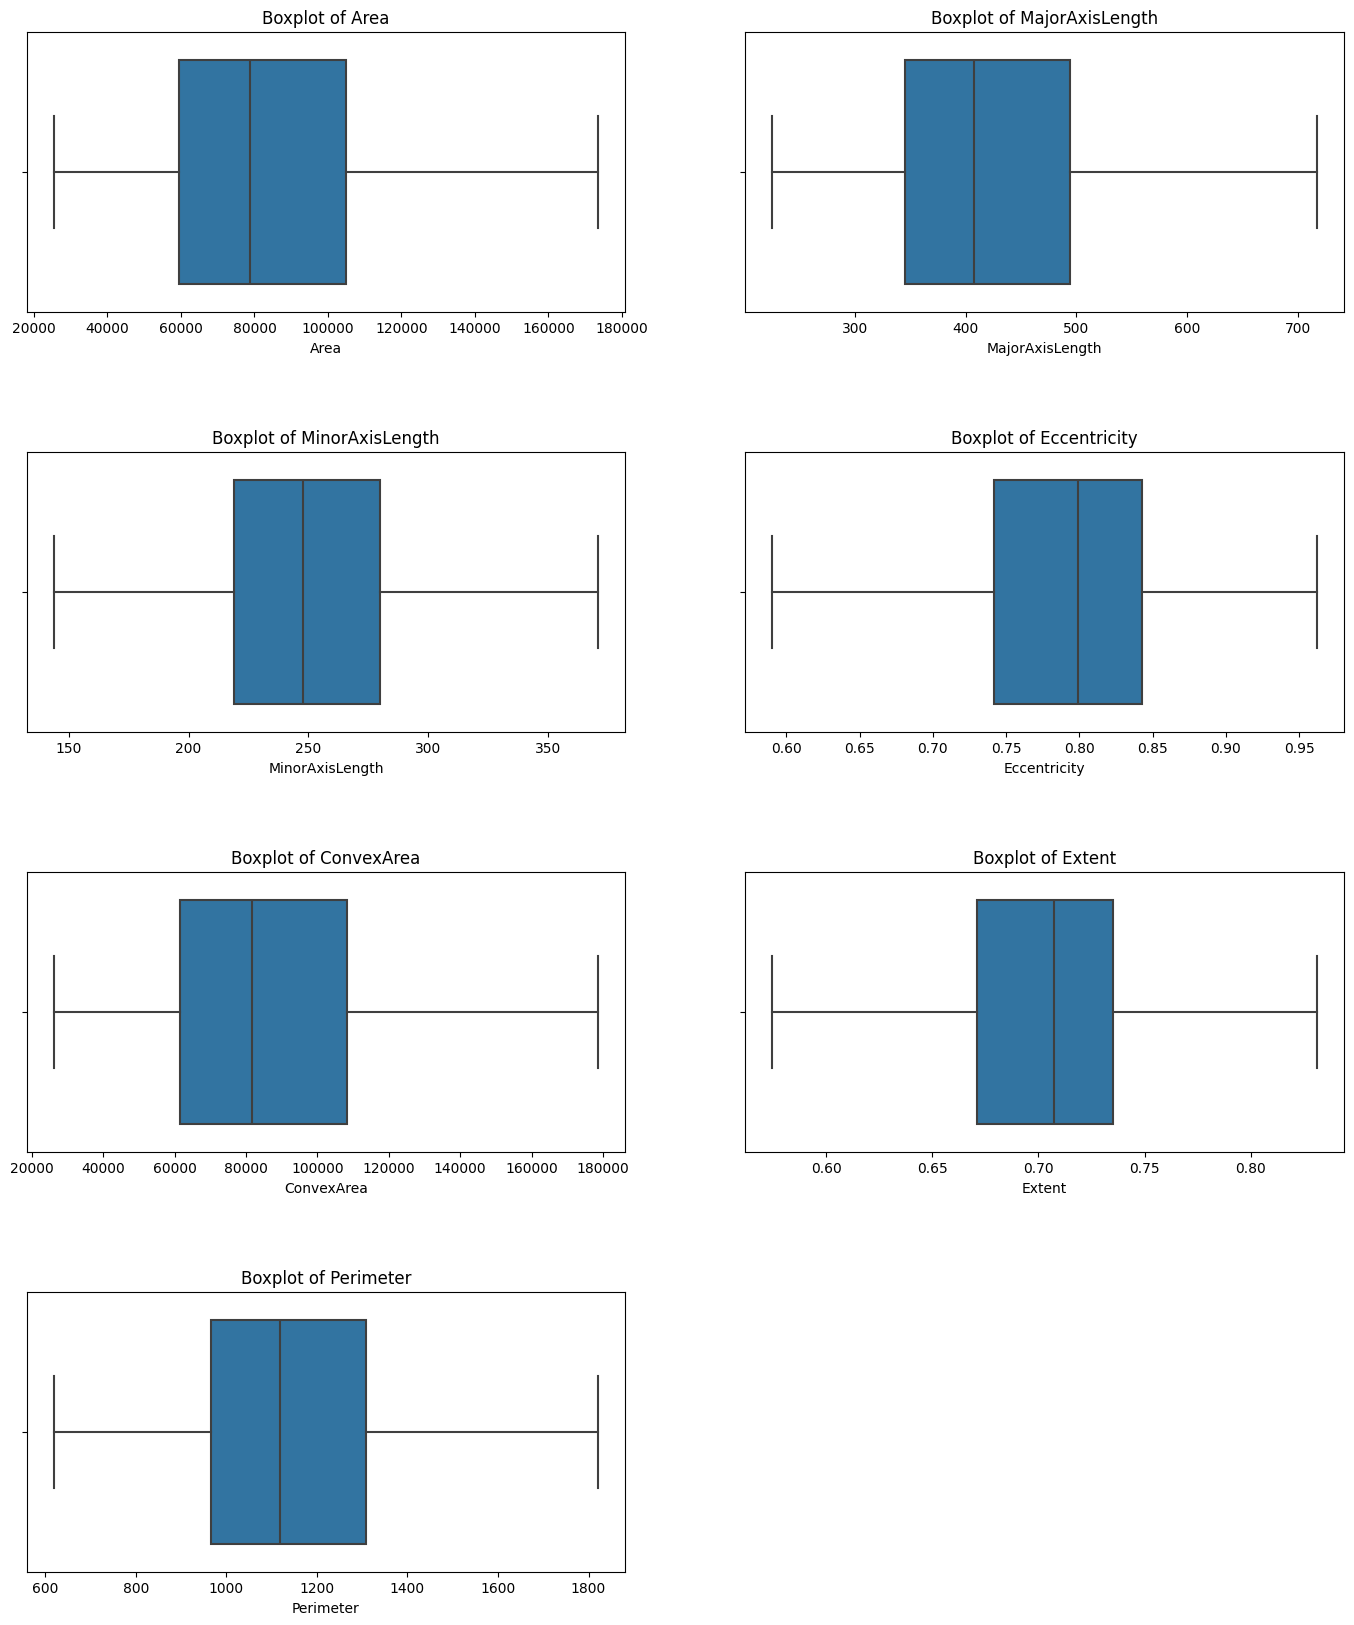

In [165]:
# Checking bloxplots after removing outliers.

features = df.columns[df.columns != "Class"]
num_rows = 4
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5*num_rows))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")
    
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

In [166]:
df.shape

(900, 8)

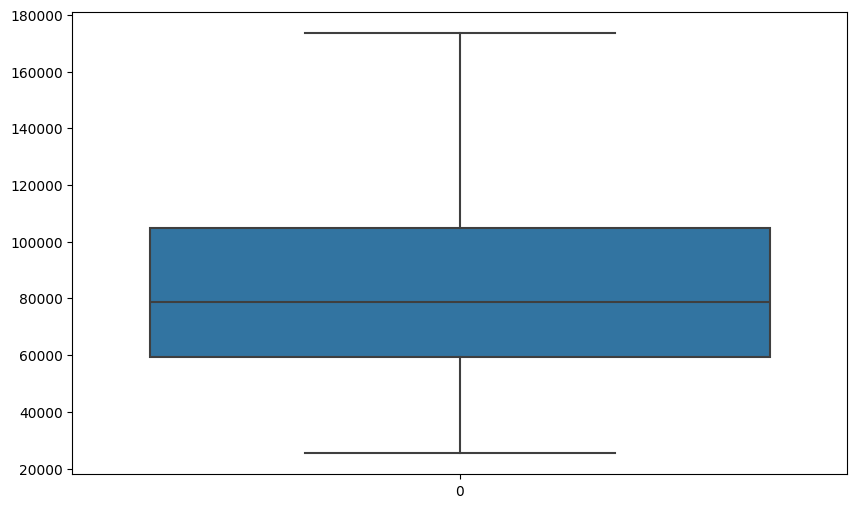

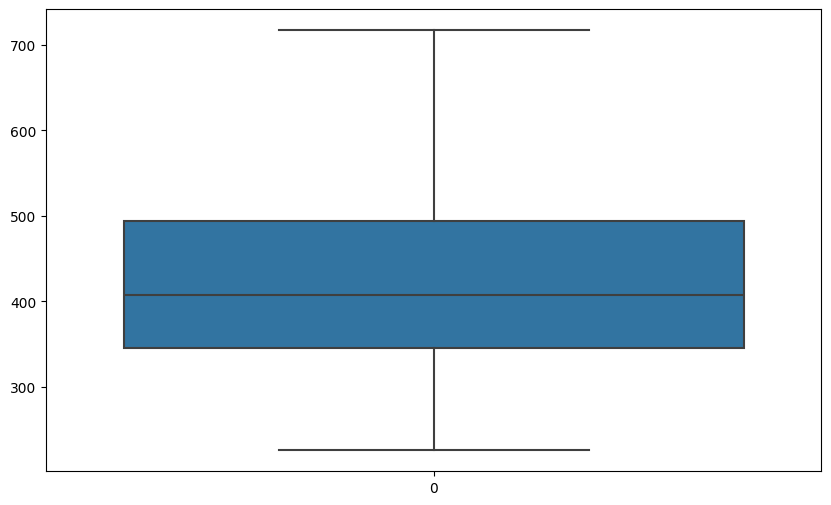

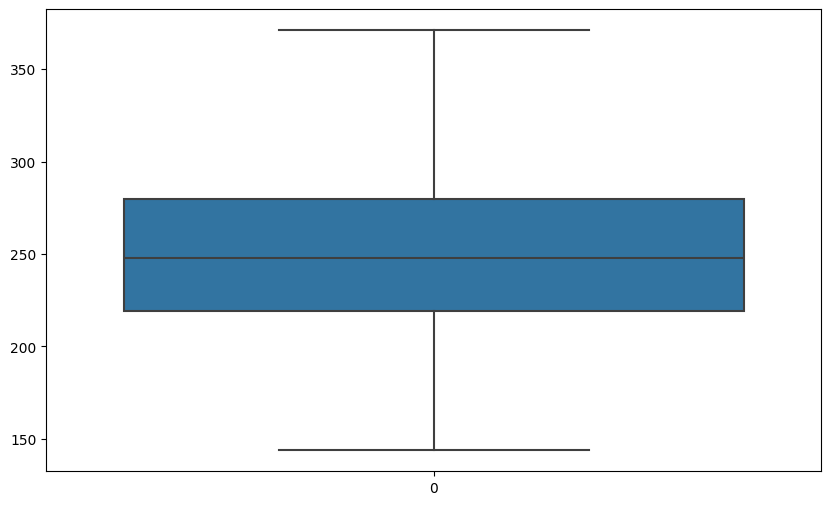

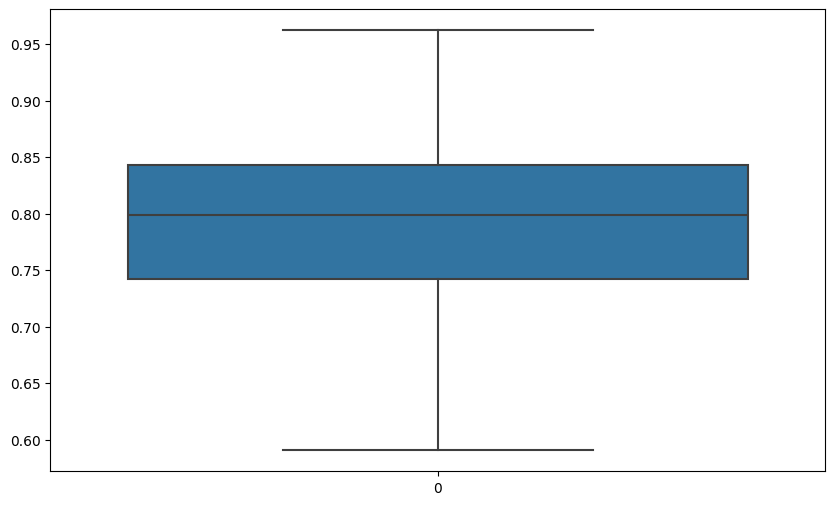

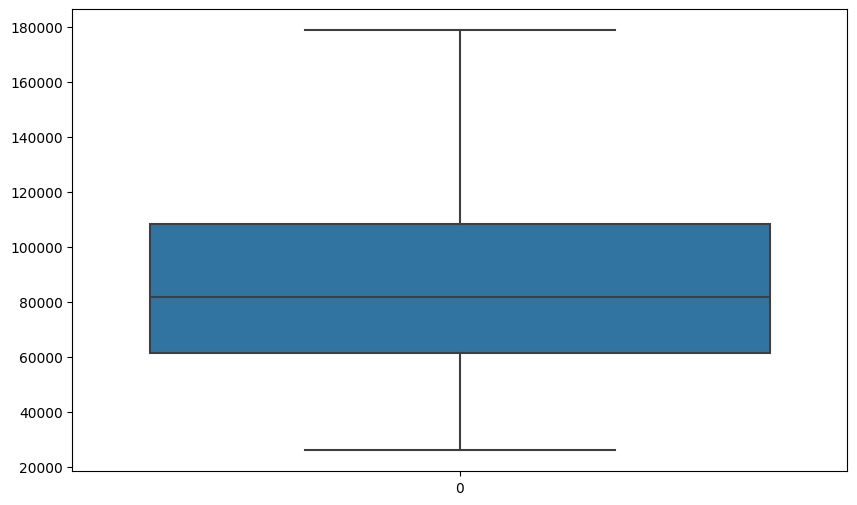

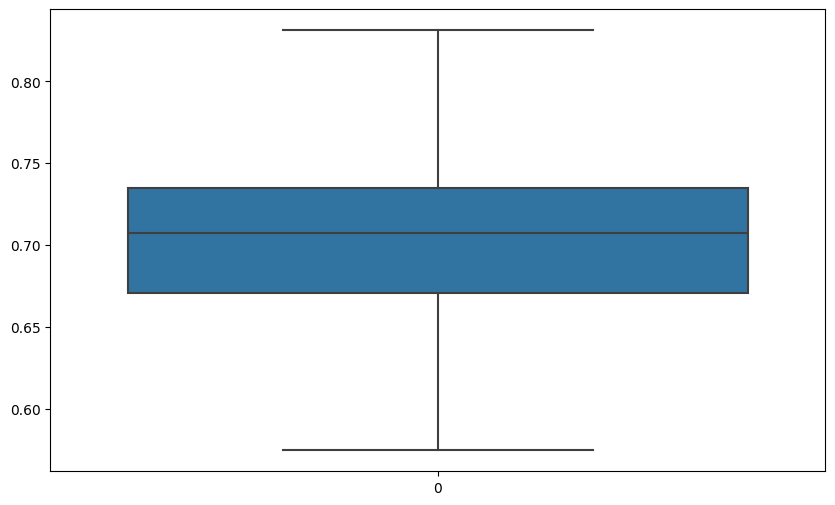

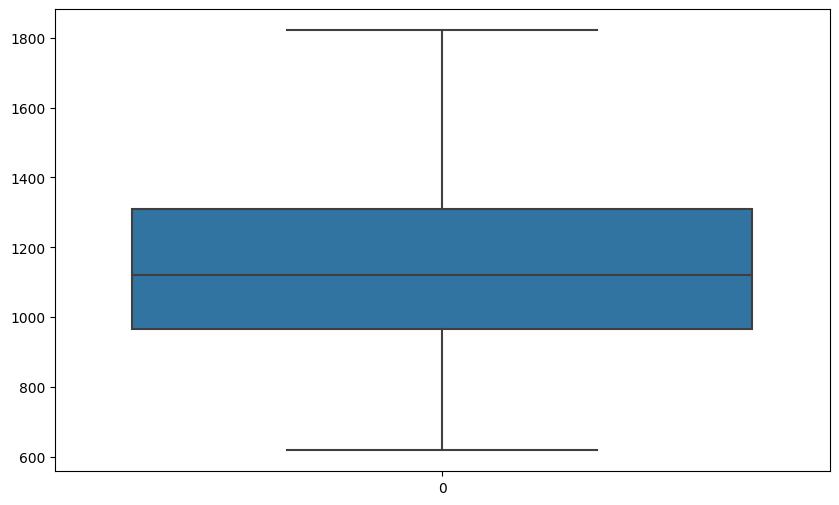

In [167]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

## Feature Correlation

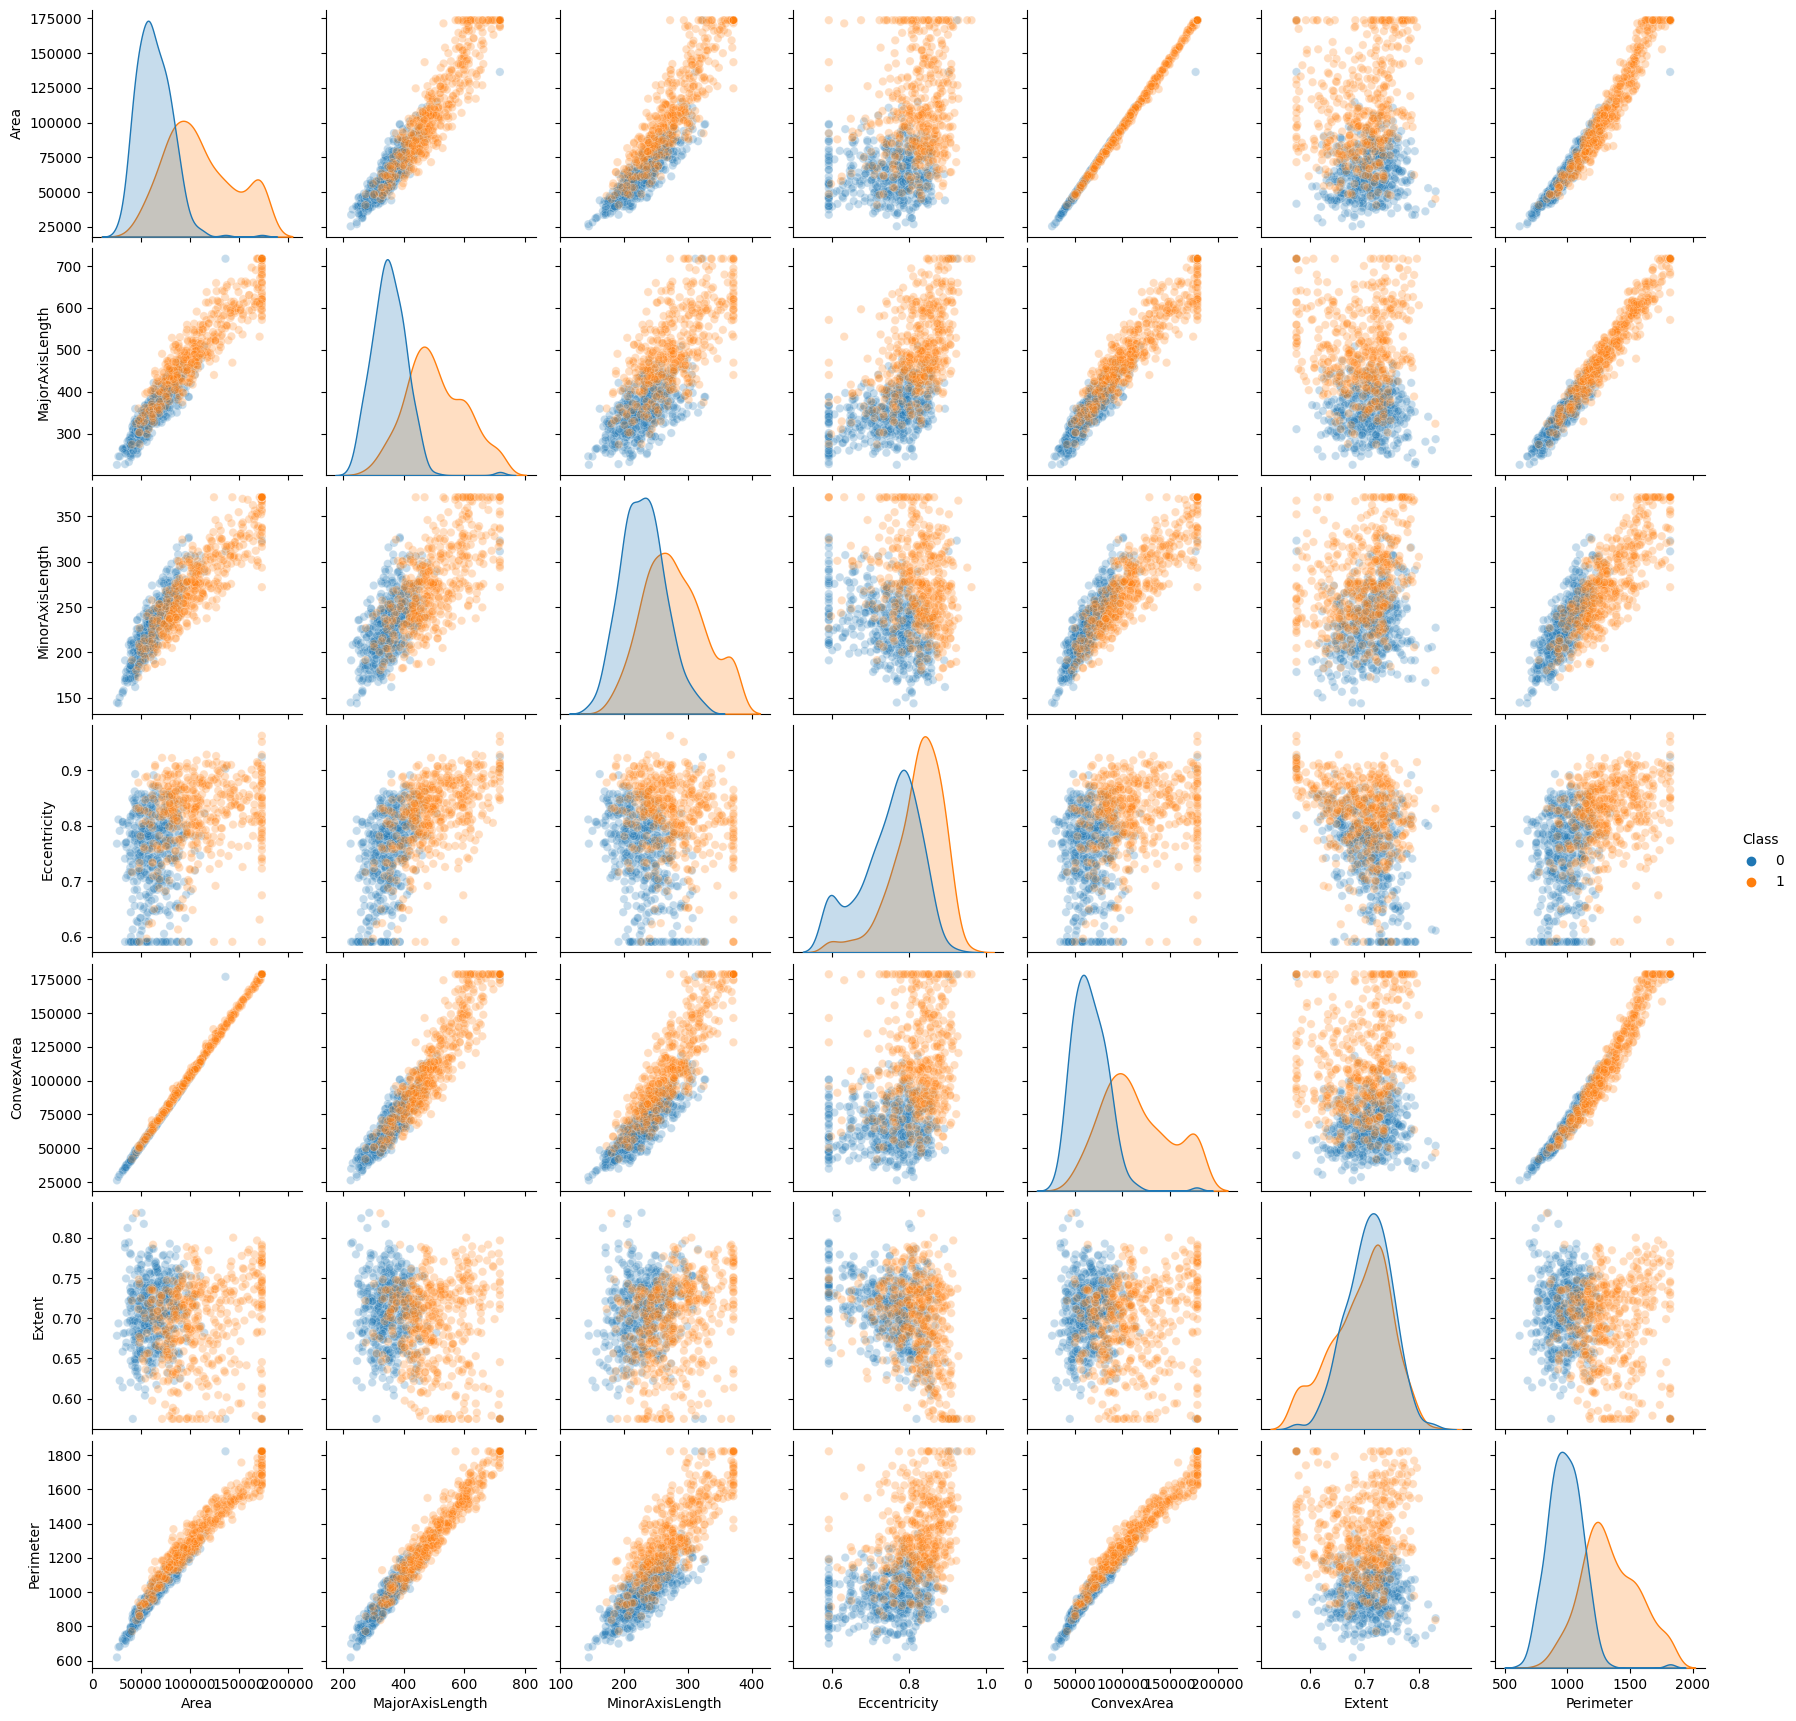

In [168]:
# pairwise scatterplot, representing Class by color
sns.pairplot(df, hue="Class",
             plot_kws = {"alpha" : 0.25})
plt.show()

In [169]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Identify highly correlated features (threshold 0.9)
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns
                   for col2 in corr_matrix.columns
                   if corr_matrix.loc[col1, col2] > 0.9 and col1 != col2]

print("Highly correlated features:")
print(high_corr_pairs)

Highly correlated features:
[('Area', 'MajorAxisLength'), ('Area', 'MinorAxisLength'), ('Area', 'ConvexArea'), ('Area', 'Perimeter'), ('MajorAxisLength', 'Area'), ('MajorAxisLength', 'ConvexArea'), ('MajorAxisLength', 'Perimeter'), ('MinorAxisLength', 'Area'), ('MinorAxisLength', 'ConvexArea'), ('ConvexArea', 'Area'), ('ConvexArea', 'MajorAxisLength'), ('ConvexArea', 'MinorAxisLength'), ('ConvexArea', 'Perimeter'), ('Perimeter', 'Area'), ('Perimeter', 'MajorAxisLength'), ('Perimeter', 'ConvexArea')]


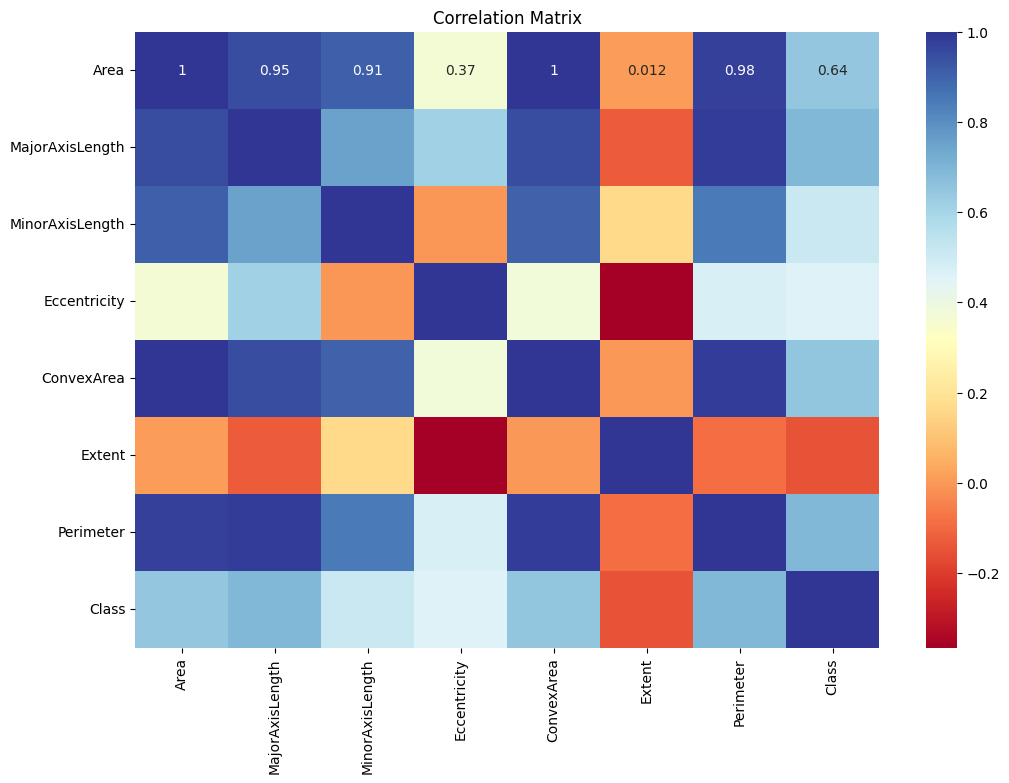

In [170]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlBu")
plt.title("Correlation Matrix")
plt.show()

In [171]:
# Drop one feature from each pair of highly correlated features
features_to_drop = ["ConvexArea", "Perimeter", "MajorAxisLength"]

# Drop the selected features from the DataFrame
df_dropped = df.drop(columns=features_to_drop)

# Display the remaining columns
print("Remaining features after dropping highly correlated ones:")
print(df_dropped.columns)


Remaining features after dropping highly correlated ones:
Index(['Area', 'MinorAxisLength', 'Eccentricity', 'Extent', 'Class'], dtype='object')


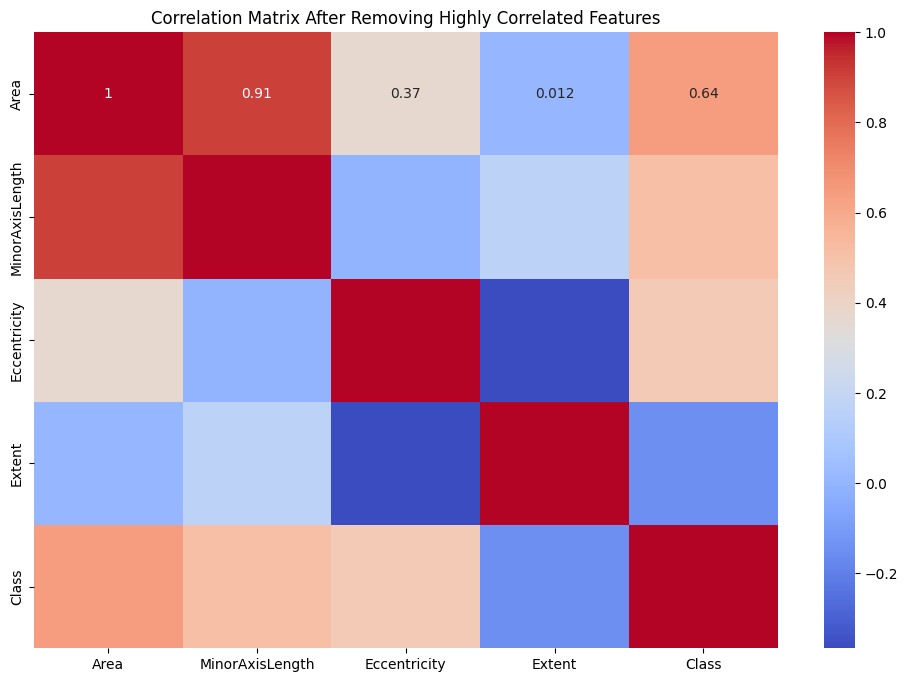

In [172]:
# Plot the new correlation matrix after removing highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(df_dropped.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix After Removing Highly Correlated Features")
plt.show()

# Logistic Regression Model

## Train | Test Split and Scaling

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [174]:
# Separating the target variable and independent variables
X = df.drop(columns=["Class"])
y = df["Class"]

In [175]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [176]:
# Scaling the features using StandardScaler
scaler = StandardScaler()

# Scaling only the numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression with Pipeline

In [177]:
# Define the pipeline with scaling and logistic regression
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

# Fit the model
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [178]:
# Display the coefficients of the logistic regression model
print("Coefficients of the Logistic Regression Model:")
print(pipe_model["logistic"].coef_)

# Display the intercept of the logistic regression model
print("\nIntercept of the Logistic Regression Model:")
print(pipe_model["logistic"].intercept_)

Coefficients of the Logistic Regression Model:
[[ 0.130716    0.53222106 -0.90003957 -0.00975708  0.40585704 -0.17134831
   2.77087134]]

Intercept of the Logistic Regression Model:
[0.51114234]


In [179]:
# Make predictions
y_pred = pipe_model.predict(X_test)
print("\nPredictions:")
print(y_pred)


Predictions:
[1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]


In [180]:
# Compute the prediction probabilities
y_pred_proba = pipe_model.predict_proba(X_test)

In [181]:
# Round the probabilities to two decimal places
y_pred_proba_rounded = np.round(y_pred_proba, 2)
print("\nRounded Prediction Probabilities:")
print(y_pred_proba_rounded)


Rounded Prediction Probabilities:
[[0.22 0.78]
 [0.72 0.28]
 [0.97 0.03]
 [0.03 0.97]
 [0.98 0.02]
 [0.54 0.46]
 [0.99 0.01]
 [0.43 0.57]
 [0.64 0.36]
 [0.7  0.3 ]
 [0.32 0.68]
 [0.02 0.98]
 [0.01 0.99]
 [0.79 0.21]
 [0.   1.  ]
 [0.01 0.99]
 [0.39 0.61]
 [0.99 0.01]
 [0.59 0.41]
 [0.31 0.69]
 [0.84 0.16]
 [0.   1.  ]
 [0.9  0.1 ]
 [0.9  0.1 ]
 [0.01 0.99]
 [0.84 0.16]
 [0.48 0.52]
 [0.01 0.99]
 [0.39 0.61]
 [0.   1.  ]
 [0.86 0.14]
 [0.02 0.98]
 [0.39 0.61]
 [0.02 0.98]
 [0.26 0.74]
 [0.04 0.96]
 [0.94 0.06]
 [0.04 0.96]
 [0.82 0.18]
 [0.97 0.03]
 [0.85 0.15]
 [0.95 0.05]
 [0.98 0.02]
 [0.88 0.12]
 [0.13 0.87]
 [0.13 0.87]
 [0.93 0.07]
 [0.38 0.62]
 [0.3  0.7 ]
 [0.33 0.67]
 [0.31 0.69]
 [0.98 0.02]
 [0.12 0.88]
 [0.93 0.07]
 [0.91 0.09]
 [0.88 0.12]
 [0.7  0.3 ]
 [0.45 0.55]
 [0.75 0.25]
 [0.14 0.86]
 [0.3  0.7 ]
 [0.9  0.1 ]
 [0.36 0.64]
 [0.72 0.28]
 [0.99 0.01]
 [0.88 0.12]
 [0.   1.  ]
 [0.   1.  ]
 [0.87 0.13]
 [0.98 0.02]
 [0.02 0.98]
 [0.06 0.94]
 [0.92 0.08]
 [0.8  0.2 ]
 [0

In [182]:
# Concatenate X_test and y_test to create test_data DataFrame
test_data = pd.concat([X_test, y_test], axis=1)
print("\nTest Data with True Labels:")
print(test_data)


Test Data with True Labels:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70   95347.000          451.526          280.226         0.784   99256.000   
827  61861.000          345.944          235.430         0.733   67390.000   
231  52693.000          283.504          242.114         0.591   54860.000   
588 112808.000          542.505          267.202         0.870  116961.000   
39   49882.000          287.264          222.186         0.634   50880.000   
..         ...              ...              ...           ...         ...   
897  99657.000          431.707          298.837         0.722  106264.000   
578 129038.000          540.815          306.818         0.823  134796.000   
779 103915.000          516.486          260.105         0.864  106499.000   
25   75620.000          368.224          263.459         0.699   77493.000   
84   77587.000          396.808          251.945         0.773   79970.000   

     Extent  Perimeter  Class  
70

In [183]:
# Add the predicted probabilities for class 1 to the test_data DataFrame
test_data["pred_proba"] = y_pred_proba[:, 1]
print("\nTest Data with Prediction Probabilities:")
print(test_data)


Test Data with Prediction Probabilities:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70   95347.000          451.526          280.226         0.784   99256.000   
827  61861.000          345.944          235.430         0.733   67390.000   
231  52693.000          283.504          242.114         0.591   54860.000   
588 112808.000          542.505          267.202         0.870  116961.000   
39   49882.000          287.264          222.186         0.634   50880.000   
..         ...              ...              ...           ...         ...   
897  99657.000          431.707          298.837         0.722  106264.000   
578 129038.000          540.815          306.818         0.823  134796.000   
779 103915.000          516.486          260.105         0.864  106499.000   
25   75620.000          368.224          263.459         0.699   77493.000   
84   77587.000          396.808          251.945         0.773   79970.000   

     Extent  Perimete

In [184]:
# Add the predictions to the test_data DataFrame
test_data["pred"] = y_pred
print("\nTest Data with Predictions:")
print(test_data)


Test Data with Predictions:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70   95347.000          451.526          280.226         0.784   99256.000   
827  61861.000          345.944          235.430         0.733   67390.000   
231  52693.000          283.504          242.114         0.591   54860.000   
588 112808.000          542.505          267.202         0.870  116961.000   
39   49882.000          287.264          222.186         0.634   50880.000   
..         ...              ...              ...           ...         ...   
897  99657.000          431.707          298.837         0.722  106264.000   
578 129038.000          540.815          306.818         0.823  134796.000   
779 103915.000          516.486          260.105         0.864  106499.000   
25   75620.000          368.224          263.459         0.699   77493.000   
84   77587.000          396.808          251.945         0.773   79970.000   

     Extent  Perimeter  Class  pre

In [185]:
# Display a sample of the test_data DataFrame
print("\nSample of Test Data:")
print(test_data.sample(10))


Sample of Test Data:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
891 107486.000          462.813          296.091         0.769  108914.000   
576 108076.000          516.073          270.743         0.851  112975.000   
843  96920.000          447.595          277.436         0.785  100285.000   
326  76407.000          373.442          264.474         0.706   79086.000   
33   61600.000          350.183          225.843         0.764   63397.000   
60   66774.000          348.558          246.476         0.707   69097.000   
525 113029.000          558.516          265.284         0.880  116783.000   
227  65469.000          374.466          227.539         0.794   68018.000   
583 126014.000          523.186          309.117         0.807  130059.000   
829 127292.000          639.851          258.382         0.915  129101.000   

     Extent  Perimeter  Class  pred_proba  pred  
891   0.760   1235.078      1       0.666     1  
576   0.699   1378.

In [186]:
# Identify misclassified instances
misclassified = test_data[((test_data["Class"] == "Besni") & (test_data["pred"] == "Kecimen"))
                          | ((test_data["Class"] == "Kecimen") &
                             (test_data["pred"] == "Besni"))]

print("\nMisclassified Instances:")
print(misclassified)


Misclassified Instances:
Empty DataFrame
Columns: [Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, Perimeter, Class, pred_proba, pred]
Index: []


In [187]:
# Count the number of misclassified instances
misclassified_count = len(misclassified)
print("\nNumber of Misclassified Instances:")
print(misclassified_count)


Number of Misclassified Instances:
0


In [188]:
# Count the total number of test instances
total_test_count = len(test_data)
print("\nTotal Number of Test Instances:")
print(total_test_count)


Total Number of Test Instances:
180


In [189]:
# Calculate the percentage of misclassified instances
misclassified_percentage = (misclassified_count / total_test_count) * 100
print("\nPercentage of Misclassified Instances:")
print(misclassified_percentage)


Percentage of Misclassified Instances:
0.0


## X_test + y_yest + y_pred + y_pred_proba

In [190]:
from sklearn.metrics import classification_report, confusion_matrix

In [191]:
# Predictions
y_pred = pipe_model.predict(X_test)

# Probabilities
y_pred_proba = pipe_model.predict_proba(X_test)

# Creating a DataFrame with predictions and actual values
results = X_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred

In [192]:
# Adding probabilities for each class
for idx, class_name in enumerate(pipe_model.classes_):
    results[f'Probability_{class_name}'] = y_pred_proba[:, idx]

# Display the first few rows of the DataFrame
print("Results DataFrame:")
print(results.head())

# Print performance metrics
print("\nAccuracy:", pipe_model.score(X_test, y_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Results DataFrame:
          Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
70   95347.000          451.526          280.226         0.784   99256.000   
827  61861.000          345.944          235.430         0.733   67390.000   
231  52693.000          283.504          242.114         0.591   54860.000   
588 112808.000          542.505          267.202         0.870  116961.000   
39   49882.000          287.264          222.186         0.634   50880.000   

     Extent  Perimeter  Actual  Predicted  Probability_0  Probability_1  
70    0.675   1255.245       0          1          0.216          0.784  
827   0.702   1063.621       1          0          0.723          0.277  
231   0.738    895.745       0          0          0.969          0.031  
588   0.743   1390.400       1          1          0.032          0.968  
39    0.766    843.764       0          0          0.977          0.023  

Accuracy: 0.8555555555555555

Confusion Matrix:
 [[79 15]
 [11 75]]

## Model Performance

In [193]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [194]:
# Model performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Model Score:", pipe_model.score(X_test, y_test))

print("Precision for class 1:", precision_score(y_test, y_pred, pos_label=1))
print("Precision for class 0:", precision_score(y_test, y_pred, pos_label=0))

print("Recall for class 1:", recall_score(y_test, y_pred, pos_label=1))
print("Recall for class 0:", recall_score(y_test, y_pred, pos_label=0))

print("F1 Score for class 1:", f1_score(y_test, y_pred, pos_label=1))
print("F1 Score for class 0:", f1_score(y_test, y_pred, pos_label=0))

Accuracy Score: 0.8555555555555555
Model Score: 0.8555555555555555
Precision for class 1: 0.8333333333333334
Precision for class 0: 0.8777777777777778
Recall for class 1: 0.872093023255814
Recall for class 0: 0.8404255319148937
F1 Score for class 1: 0.8522727272727274
F1 Score for class 0: 0.858695652173913


In [195]:
# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[79 15]
 [11 75]]


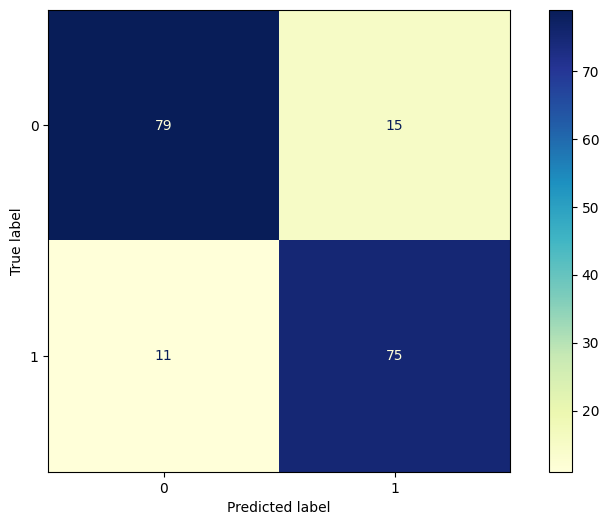

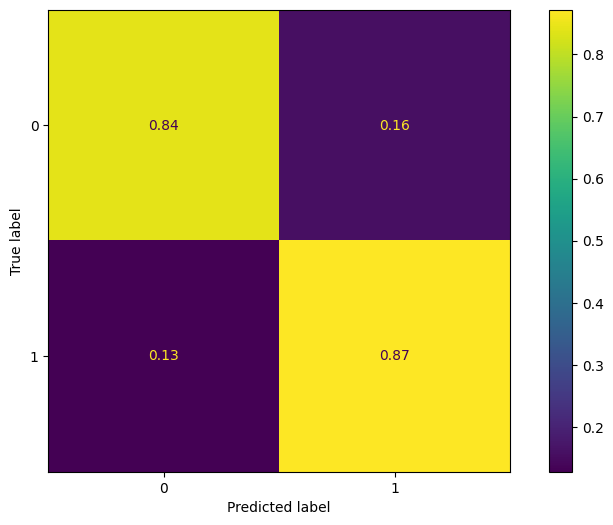

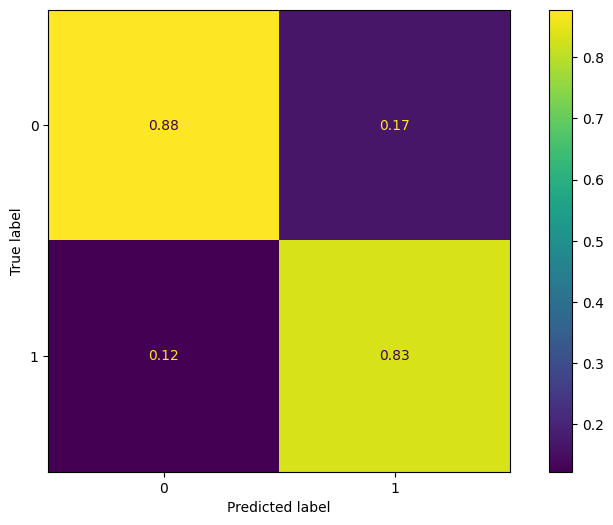

In [196]:
# Confusion matrix visualizations
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, cmap="YlGnBu")
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='true')
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test, normalize='pred')

In [197]:
# Function to evaluate metrics for both training and test sets
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [198]:
# Evaluate metrics for both training and test sets
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train Set
[[318  38]
 [ 57 307]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.84      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## Cross Validate

In [199]:
from sklearn.model_selection import cross_validate
import sklearn

# Check available scorers
print(sklearn.metrics.SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [200]:
# Define the pipeline with scaling and logistic regression
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)

# Perform cross-validation
scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1'], cv=10, return_train_score=True)

# Convert cross-validation scores to DataFrame
df_scores = pd.DataFrame(scores, index=range(1, 11))

In [201]:
# Fit the model on the full training data
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [202]:
# Display the scores DataFrame
print("\nCross-validation Scores DataFrame:")
print(df_scores)

# Display the mean scores for each metric
print("\nMean Scores:")
print(df_scores.mean()[2:])


Cross-validation Scores DataFrame:
    fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
1      0.005       0.000          0.847           0.867           0.821   
2      0.006       0.004          0.861           0.866           0.906   
3      0.006       0.002          0.819           0.877           0.811   
4      0.000       0.006          0.931           0.863           0.970   
5      0.008       0.004          0.847           0.870           0.879   
6      0.006       0.003          0.903           0.867           0.892   
7      0.003       0.003          0.778           0.884           0.818   
8      0.003       0.004          0.833           0.877           0.879   
9      0.003       0.001          0.917           0.864           0.897   
10     0.003       0.001          0.903           0.867           0.969   

    train_precision  test_recall  train_recall  test_f1  train_f1  
1             0.885        0.889         0.848    0.853     0.866  
2 

In [203]:
# Evaluate metrics for both training and test sets
eval_metric(model, X_train, y_train, X_test, y_test)

Test Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train Set
[[318  38]
 [ 57 307]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.84      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## GridSearchCV

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [205]:
# Penalty options
penalty = ["l1", "l2"]

# Logarithmic range for C values
C = np.logspace(-1, 5, 20)

# Solver options
solver = ["lbfgs", "liblinear", "sag", "saga"]

# Creating the parameter grid
param_grid = [
    {
        "logistic__penalty": ["l1"],
        "logistic__C": C,
        "logistic__solver": ["liblinear", "saga"]
    },
    {
        "logistic__penalty": ["l2"],
        "logistic__C": C,
        "logistic__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    },
    {
        "logistic__penalty": ["elasticnet"],
        "logistic__C": C,
        "logistic__solver": ["saga"],
        "logistic__l1_ratio": np.linspace(0, 1, 10)  # Adding l1_ratio for ElasticNet
    },
    {
        "logistic__penalty": ["none"],
        "logistic__solver": ["newton-cg", "lbfgs", "sag", "saga"]
    }
]

In [206]:
# Creating the GridSearchCV object
grid_model = GridSearchCV(pipe_model, param_grid=param_grid, cv=5, return_train_score=True, n_jobs=-1)

In [207]:
# Fitting the model
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.2...
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                          'logistic__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                          'logistic__penalty': ['elasticnet'],
                          'logistic__solver': ['saga']},
                         {'logistic__penalty': ['none'],
                          'logistic__solver': ['newton-cg', 'lbfgs', 'sag',
                                               'saga']}],
             return_train_score=True)

In [208]:
# Printing the best parameters and best score
print("Best Parameters:", grid_model.best_params_)
print("Best Score:", grid_model.best_score_)

Best Parameters: {'logistic__C': 7.847599703514611, 'logistic__l1_ratio': 0.7777777777777777, 'logistic__penalty': 'elasticnet', 'logistic__solver': 'saga'}
Best Score: 0.8736111111111112


In [209]:
# Making predictions on the test set
y_pred = grid_model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0]


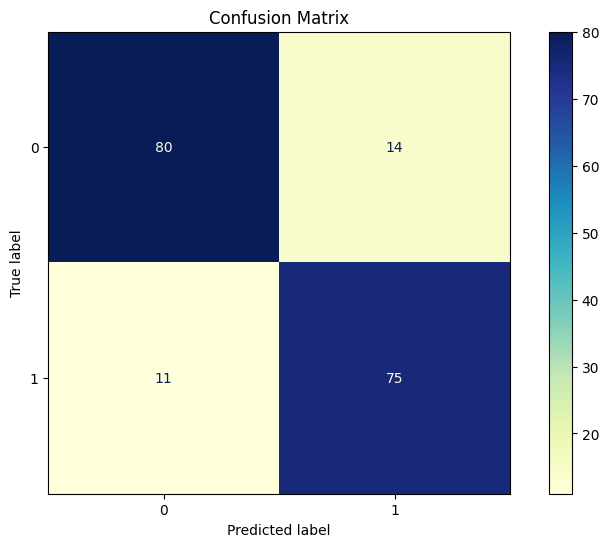

In [210]:
# Confusion matrix display
ConfusionMatrixDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

In [211]:
# Evaluating performance metrics
eval_metric(grid_model.best_estimator_, X_train, y_train, X_test, y_test)

Test Set
[[80 14]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        94
           1       0.84      0.87      0.86        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train Set
[[320  36]
 [ 54 310]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       356
           1       0.90      0.85      0.87       364

    accuracy                           0.88       720
   macro avg       0.88      0.88      0.87       720
weighted avg       0.88      0.88      0.87       720



## Precision-Recall Curve & ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [212]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve
import matplotlib.pyplot as plt

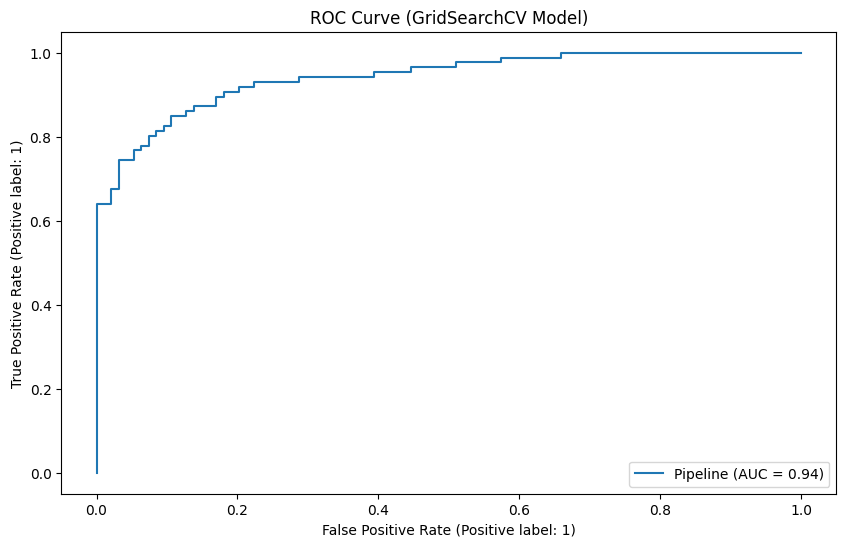

In [213]:
# Displaying ROC Curve for GridSearchCV model
RocCurveDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test)
plt.title('ROC Curve (GridSearchCV Model)')
plt.show()

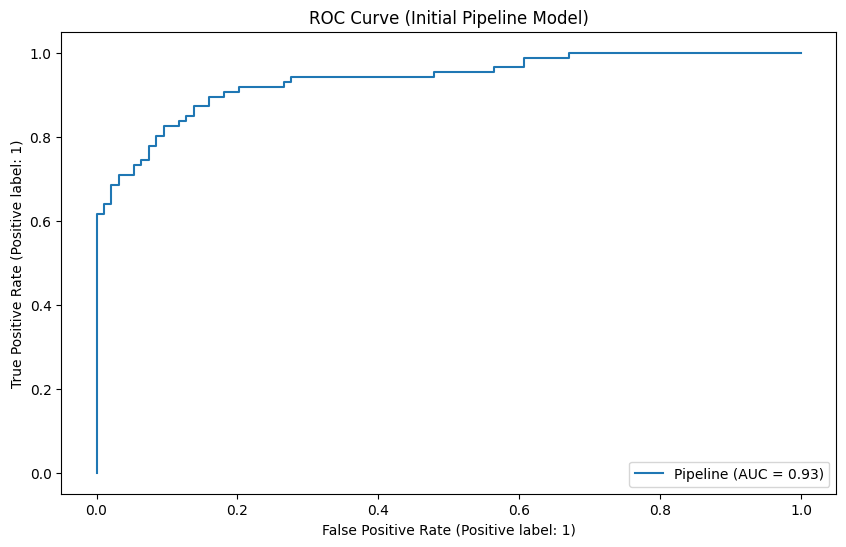

In [214]:
# Displaying ROC Curve for initial Pipeline model
RocCurveDisplay.from_estimator(pipe_model, X_test, y_test)
plt.title('ROC Curve (Initial Pipeline Model)')
plt.show()

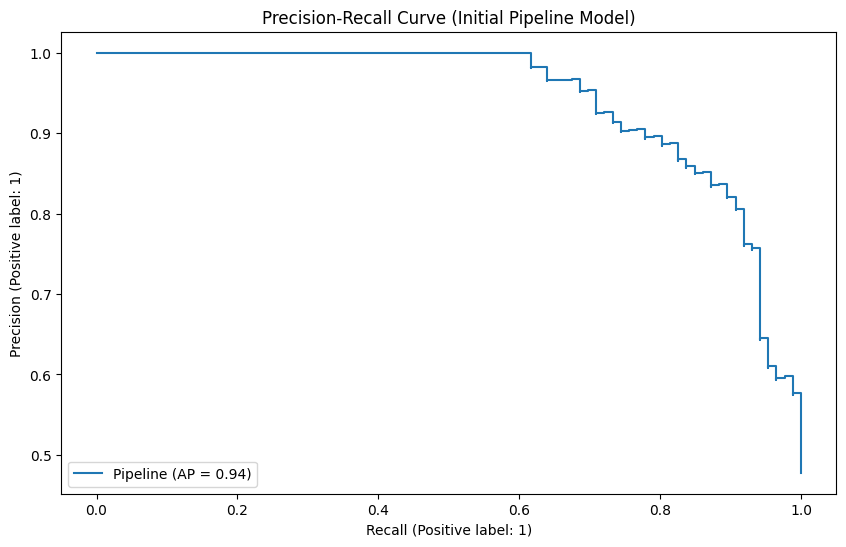

In [215]:
# Displaying Precision-Recall Curve for initial Pipeline model
PrecisionRecallDisplay.from_estimator(pipe_model, X_test, y_test)
plt.title('Precision-Recall Curve (Initial Pipeline Model)')
plt.show()

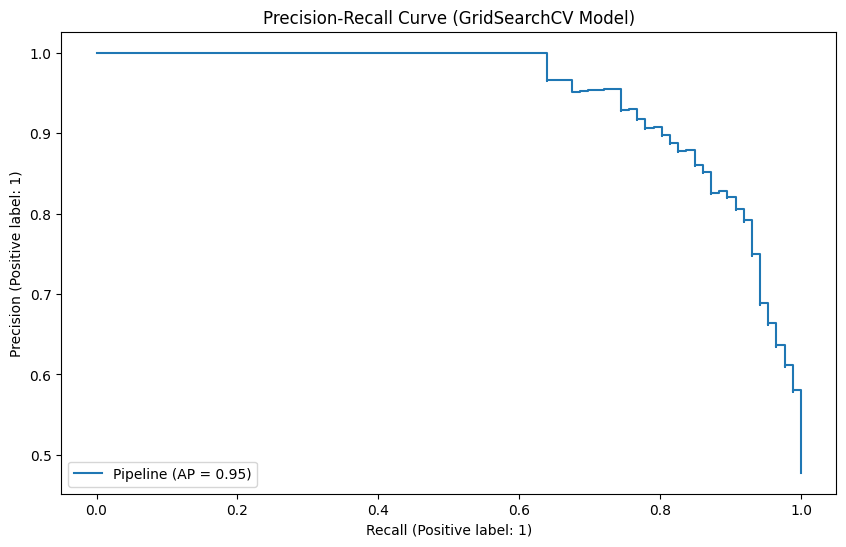

In [216]:
# Displaying Precision-Recall Curve for GridSearchCV model
PrecisionRecallDisplay.from_estimator(grid_model.best_estimator_, X_test, y_test)
plt.title('Precision-Recall Curve (GridSearchCV Model)')
plt.show()

# Prediction

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

In [218]:
# Define the pipeline with StandardScaler and LogisticRegression
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

# Create and fit the final model pipeline
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [219]:
# Save the trained model to a file
with open("final_pipe_model.pkl", "wb") as model_file:
    pickle.dump(final_model, model_file)

# Load the trained model from the file
with open("final_pipe_model.pkl", "rb") as model_file:
    new_model = pickle.load(model_file)

In [71]:
# New data for prediction
new_data = pd.DataFrame({
    'Area': [89500.000, 77000.000, 98500.000, 170000.000, 81500.000],
    'MajorAxisLength': [225, 230, 500, 715, 225],
    'MinorAxisLength': [265.000, 255.000, 243.000, 299.000, 300.000],
    'Eccentricity': [0.830, 0.815, 0.880, 0.900, 0.610],
    'ConvexArea': [1650, 1750, 10391, 1550, 17700],
    'Extent': [0.765, 0.695, 0.573, 0.750, 0.805],
    'Perimeter': [430, 440, 1346, 1740, 435]  
})

In [72]:
# Make predictions on the new data
predictions = new_model.predict(new_data)
predictions_proba = new_model.predict_proba(new_data)

In [73]:
# Add prediction results and probabilities to the new data DataFrame
new_data["pred"] = predictions
new_data["pred_proba_Besni"] = predictions_proba[:,0]
new_data["pred_proba_Kecimen"] = predictions_proba[:,1]
new_data

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  89500.000              225          265.000         0.830        1650   
1  77000.000              230          255.000         0.815        1750   
2  98500.000              500          243.000         0.880       10391   
3 170000.000              715          299.000         0.900        1550   
4  81500.000              225          300.000         0.610       17700   

   Extent  Perimeter  pred  pred_proba_Besni  pred_proba_Kecimen  
0   0.765        430     0             1.000               0.000  
1   0.695        440     0             1.000               0.000  
2   0.573       1346     1             0.104               0.896  
3   0.750       1740     1             0.003               0.997  
4   0.805        435     0             1.000               0.000

In [74]:
# Display the new data with predictions and probabilities
print(new_data)

        Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  89500.000              225          265.000         0.830        1650   
1  77000.000              230          255.000         0.815        1750   
2  98500.000              500          243.000         0.880       10391   
3 170000.000              715          299.000         0.900        1550   
4  81500.000              225          300.000         0.610       17700   

   Extent  Perimeter  pred  pred_proba_Besni  pred_proba_Kecimen  
0   0.765        430     0             1.000               0.000  
1   0.695        440     0             1.000               0.000  
2   0.573       1346     1             0.104               0.896  
3   0.750       1740     1             0.003               0.997  
4   0.805        435     0             1.000               0.000  
